In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
from keras import layers
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Activation,Flatten,Dense,Input,ZeroPadding2D,AveragePooling2D
from keras.models import Model,load_model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from PIL import Image
from matplotlib import image
import matplotlib.pyplot as plt
from keras.initializers import glorot_uniform
from keras.utils import to_categorical

In [2]:
from google.colab import files
import os
uploaded = files.upload()
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c digit-recognizer    # loading the data from kaggle

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 67 Aug 27 05:52 kaggle.json
 55% 5.00M/9.16M [00:00<00:00, 24.4MB/s]
100% 9.16M/9.16M [00:00<00:00, 36.3MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 72.4MB/s]
 99% 6.00M/6.09M [00:00<00:00, 23.1MB/s]
100% 6.09M/6.09M [00:00<00:00, 24.1MB/s]


In [3]:
!unzip -q train.csv

In [4]:
import pandas as pd
tt = pd.read_csv('train.csv')                          # looking at the data for a better idea
print(tt)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      1       0       0       0  ...         0         0         0         0
41997      7       0       0       0  ...         0         0         0         0
41998      6       0       0       0  ...         0         0         0         0
41999      9       0       0       0  ...         0         0         0         0

[42000 rows x 7

In [5]:
#print(tt.shape)
x = tt.drop(labels='label',axis = 1)                    # fixing x as the pixels
#print(x.shape)
y = tt['label']                                         # fixing y as the label
#print(y)

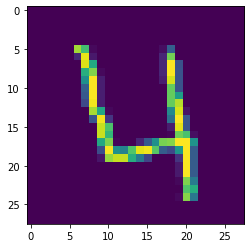

In [6]:
x = np.asarray(x)
x = x.reshape(42000,28,28)
plt.imshow(x[3])
x = x.reshape(42000,28,28,1)                            # resizing the array to 28,28,1

In [7]:
def Kmodel(inp_shape):                                            # defining the Convolutional Model
  X_inp = Input(shape = inp_shape)

  X = Conv2D(64,(5,5),strides = (1,1),padding = 'valid',name = '1lay')(X_inp)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  print(X.shape)

  X = Conv2D(64,(3,3),strides=(1,1),padding = 'same',name = '2lay')(X)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  print(X.shape)

  X = Conv2D(128,(5,5),strides=(1,1),padding = 'valid',name = '3lay')(X)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  print(X.shape)

  X = Conv2D(128,(5,5),strides=(2,2),padding = 'valid',name = '4lay')(X)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  print(X.shape)
  X = Conv2D(256,(5,5),strides=(1,1),padding = 'valid',name = '5lay')(X)
  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  print(X.shape)

  X = Flatten()(X)
  X = Dense(10,activation = 'softmax',name = '7lay')(X)
  print(X.shape)

  model = Model(inputs = X_inp,outputs = X,name = 'trialone')
  return model

In [8]:
xt = Kmodel([28,28,1])

(None, 24, 24, 64)
(None, 24, 24, 64)
(None, 20, 20, 128)
(None, 8, 8, 128)
(None, 4, 4, 256)
(None, 10)


In [9]:
xt.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [10]:
y = np.asarray(y)
y = y.reshape((42000,1))
print(x.shape)
print(y.shape)
y_train = to_categorical(y,num_classes=10)
print(y_train.shape)
#model.fit(x,y)

(42000, 28, 28, 1)
(42000, 1)
(42000, 10)


In [11]:
xt.fit(x,y_train,batch_size=64,epochs=5)                    # training the data for 5 epochs

Epoch 1/5
657/657 [==============================] - 895s 1s/step - loss: 0.1127 - accuracy: 0.9659
Epoch 2/5
657/657 [==============================] - 895s 1s/step - loss: 0.0517 - accuracy: 0.9851
Epoch 3/5
657/657 [==============================] - 894s 1s/step - loss: 0.0405 - accuracy: 0.9883
Epoch 4/5
657/657 [==============================] - 888s 1s/step - loss: 0.0326 - accuracy: 0.9900
Epoch 5/5
657/657 [==============================] - 892s 1s/step - loss: 0.0289 - accuracy: 0.9910


In [13]:
!unzip -q test.csv

(28000, 784)
(28000, 28, 28, 1)


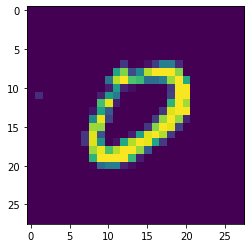

In [14]:
test = pd.read_csv('test.csv')
test = np.asarray(test)
print(test.shape)
test = test.reshape(28000,28,28)
#print(x)
plt.imshow(test[3])
test = test.reshape(28000,28,28,1)
print(test.shape)

In [18]:
k = xt.predict(test)                          # getting the prediction for submission purposes
#print(k)

In [16]:
ans = np.arange(len(k))
for x in range(len(k)):
  ans[x] = np.argmax(k[x])                      # using argmax to convert it from softmax type to scalar type
print(ans)

[2 0 9 ... 3 9 2]


In [17]:
print(len(ans))
sub1 = pd.DataFrame({'ImageId':np.arange(1,len(ans)+1),'Label':ans},index = None)
print(sub1)
sub1.to_csv('Sub1.csv',index=False)             # downloading the prediction for submission
files.download('Sub1.csv')

28000
       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>